# 1時間後のUSD/JPYの値段を予測する

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.append('../')

from lib import lib

In [7]:
li_currency = ["USDJPY","EURJPY","EURUSD","GBPJPY","CADJPY","CHFJPY","GBPUSD","USDCHF","SEKJPY","NOKJPY",
"EURGBP","USDCAD","TRYJPY","ZARJPY","MXNJPY","TRYUSD","EURTRY","RUBJPY","AUDJPY","NZDJPY",
"AUDUSD","NZDUSD","EURAUD","GBPAUD","AUDCAD","EURNZD","AUDNZD","CNYJPY","HKDJPY","SGDJPY"]

In [8]:
CURRENCY = "USDJPY"
PERIOD = 6 # 予測の間隔
PERIOD2 = 6 # 変化の間隔
PIP = 0.05

In [9]:
target, day = lib.makeTarget(CURRENCY)
dayweek = list(map(lib.dayweek,day))
dayhour = list(map(lib.dayhour,day))

In [10]:
data = lib.makeData(li_currency).values
diffs = lib.diffData(data,PERIOD2)
data = data[PERIOD2:]
data = np.concatenate([data,diffs],1)[max(PERIOD-PERIOD2,0):]

In [11]:
target = lib.diffTarget(target,PERIOD)[max(PERIOD2-PERIOD,0):]

In [12]:
len(data)

6779

In [13]:
len(target)

6779

In [14]:
size = len(target)
dayweek = dayweek[max(PERIOD2,PERIOD):]
dayhour = dayhour[max(PERIOD2,PERIOD):]

In [15]:
data, target = lib.checkDay(data,target,dayweek,dayhour,size)
data = np.array(data)

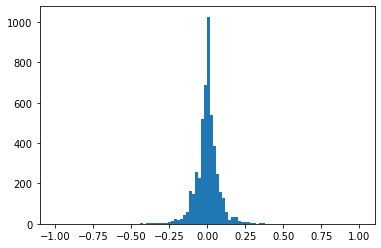

In [16]:
plt.hist(target, range=(-1, 1), bins=100);

In [17]:
target2 = [lib.highlow(i,PIP) for i in target]
target3 = [lib.highlow2(i,PIP) for i in target]
target4 = [lib.highlow3(i,PIP) for i in target]

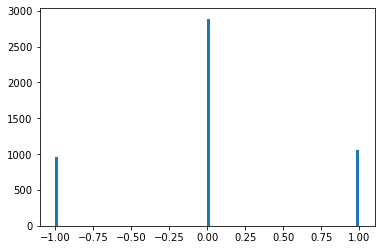

In [18]:
plt.hist(target2, range=(-1, 1), bins=100);

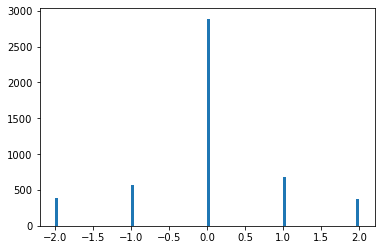

In [19]:
plt.hist(target3, range=(-2, 2), bins=100);

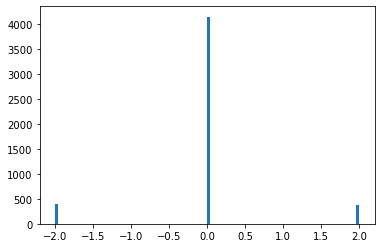

In [20]:
plt.hist(target4, range=(-2, 2), bins=100);

# データ成型は終了

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm

In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

## 多層パーセプトロンで予測を行う

In [23]:
clf = MLPClassifier(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.594704684317719
[[ 32  59   4]
 [ 17 181  55]
 [  6  58  79]]


In [24]:
clf = MLPClassifier(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.46028513238289204
[[ 14   2  15   3   1]
 [  0  10  39  11   0]
 [  2  25 143  68  15]
 [  0   0  19  39  17]
 [  0   1  15  32  20]]


In [25]:
clf = MLPClassifier(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=300, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.8433333333333334
[[ 12   8   0]
 [  3 230   3]
 [  2  31  11]]


0.008910122303734289
[[ 1.         -0.12746276]
 [-0.12746276  1.        ]]


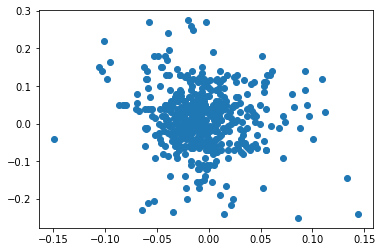

In [26]:
clf = MLPRegressor(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

0.5215475730203536
[[1.         0.51555073]
 [0.51555073 1.        ]]


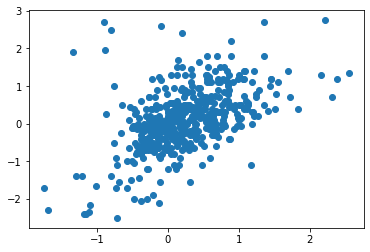

In [27]:
clf = MLPRegressor(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, [i * 10 for i in target], test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

68364861321.32815
[[ 1.        -0.0493605]
 [-0.0493605  1.       ]]


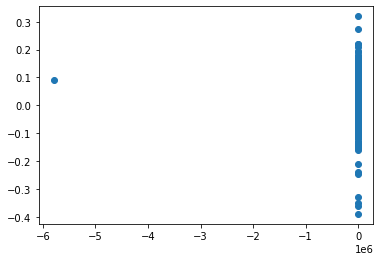

In [28]:
clf = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

## サポートベクターマシンで予測を行う

In [29]:
clf = svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.45824847250509165
[[ 22  65   8]
 [ 36 156  61]
 [ 17  79  47]]


C:\Users\Takumi Inui\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [30]:
clf = svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.3380855397148676
[[  8  11  14   2   0]
 [  3  12  42   3   0]
 [  0  93 130  22   8]
 [  0  26  37   9   3]
 [  1  18  34   8   7]]


C:\Users\Takumi Inui\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [31]:
clf = svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.7881873727087576
[[ 12  21   2]
 [  5 361  22]
 [  2  52  14]]


C:\Users\Takumi Inui\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## ランダムフォレストで予測を行う

In [32]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 40)
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.5906313645621182
[[ 18  72   5]
 [  4 229  20]
 [  0 100  43]]


In [33]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 40)
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.5193482688391039
[[  2   2  30   1   0]
 [  1   0  59   0   0]
 [  0   0 249   4   0]
 [  0   0  73   2   0]
 [  0   0  63   3   2]]


In [34]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 40)
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.7942973523421588
[[  2  33   0]
 [  0 388   0]
 [  0  68   0]]


0.002552462927132208
[[1.         0.76561279]
 [0.76561279 1.        ]]


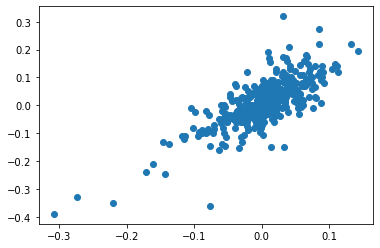

In [35]:
clf = RandomForestRegressor(n_estimators=9, max_depth=9, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

0.2673717156424042
[[1.         0.75157634]
 [0.75157634 1.        ]]


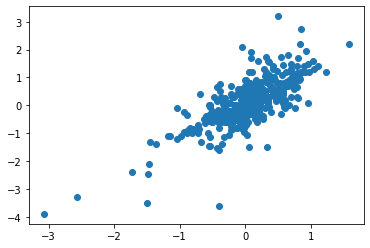

In [36]:
clf = RandomForestRegressor(n_estimators=9, max_depth=9, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data, [i * 10 for i in target], test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

## Adaboostで予測を行う

In [37]:
clf = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.6252545824847251
[[ 49  39   7]
 [ 15 179  59]
 [  6  58  79]]


In [38]:
clf = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.5010183299389002
[[ 12  13  10   0   0]
 [  2  17  41   0   0]
 [  5  15 175  52   6]
 [  0   3  36  29   7]
 [  1   2  23  29  13]]


In [39]:
clf = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.8044806517311609
[[ 13  22   0]
 [ 10 367  11]
 [  0  53  15]]


0.12100483981465088
[[1.        0.9015886]
 [0.9015886 1.       ]]


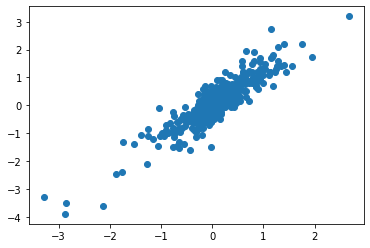

In [40]:
clf = GradientBoostingRegressor(random_state=1, n_estimators=100, max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(data, [i * 10 for i in target], test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)